In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
# Read in initial dataframe, create df2, dictionary of blocks
df_train = pd.read_csv("Train_Arabic_Digit.csv", header = None)
df_train["block"] = df_train.isnull().all(axis=1).cumsum()

df_test = pd.read_csv("Test_Arabic_Digit.csv", header = None)
df_test["block"] = df_test.isnull().all(axis=1).cumsum()

df2_train = {i: df_train.loc[df_train.block == i, df_train.columns.drop('block')].dropna()
       for i in range(0, df_train.block.iat[-1])}

# Create df3, a dictionary of concatenated blocks by digit
df_train["block"] = np.floor(df_train["block"] / 660)
df3_train = {i: df_train.loc[df_train.block == i, df_train.columns.drop('block')].dropna()
       for i in range(10)}

# Create a dataset of just the first, second cepstral coefs for efficiency
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'block']
df_cut_train = df_train.dropna()
df_cut_train = {i: df_cut_train.loc[df_cut_train.block == i, df_cut_train.columns.drop('block')]
       for i in range(10)}

# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'block']
df_cut_test = df_test.dropna()
df_cut_test = {i: df_cut_test.loc[df_cut_test.block == i, df_cut_test.columns.drop('block')]
       for i in range(0, df_cut_test.block.iat[-1])}

C:\Users\19083\anaconda3\envs\compsci371d\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


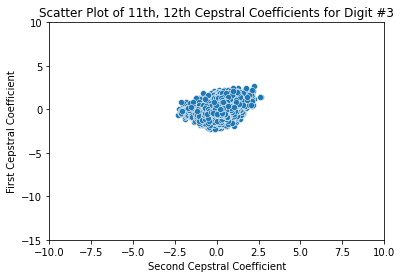

In [23]:
# Create a scatter plot for all the blocks of one digit
digit = 0
# plt.scatter(df3_train[digit].iloc[:,0], df3_train[digit].iloc[:,1])
sns.scatterplot(df3_train[digit].iloc[:,11], df3_train[digit].iloc[:,12])
plt.title('Scatter Plot of 11th, 12th Cepstral Coefficients for Digit #3')
plt.ylabel('First Cepstral Coefficient')
plt.xlabel('Second Cepstral Coefficient')
plt.xlim(-10, 10)
plt.ylim(-15, 10)

plt.savefig("cepstral_scatter", dpi=300)
# plt.xlim((-15,10))
# plt.ylim((-7,7))

C:\Users\19083\anaconda3\envs\compsci371d\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19083\anaconda3\envs\compsci371d\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\19083\anaconda3\envs\compsci371d\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

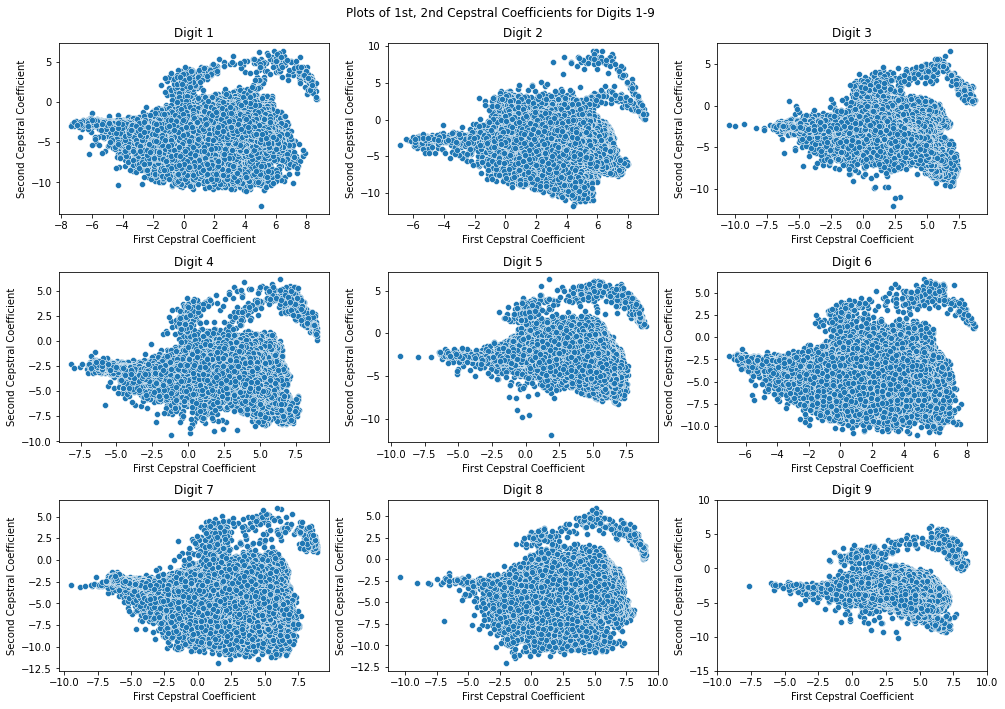

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(14,10))
fig.suptitle('Plots of 1st, 2nd Cepstral Coefficients for Digits 1-9')

for digit in range(9):
    axes[int(digit/3), digit % 3].set(title="Digit " + str(digit + 1), xlabel='First Cepstral Coefficient', ylabel='Second Cepstral Coefficient')
    sns.scatterplot(df3_train[digit].iloc[:,0], df3_train[digit].iloc[:,1], ax=axes[int(digit/3), digit % 3])
    plt.xlim(-10, 10)
    plt.ylim(-15,10)
    # plt.ylabel('First Cepstral Coefficient')
    # plt.xlabel('Second Cepstral Coefficient')
    # plt.title("Digit " + str(digit + 1))

fig.tight_layout()
plt.savefig('cepstral_coefs_all.png', dpi=300)

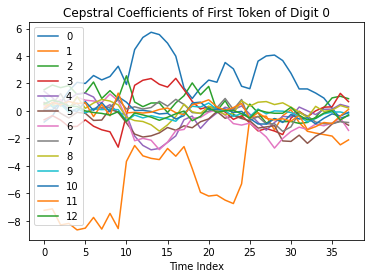

In [5]:
# Plot some of the cepstral coefs by time
df2_train[0].loc[:,0:12].plot()
plt.title("Cepstral Coefficients of First Token of Digit 0")
plt.xlabel("Time Index")
plt.savefig('timecepstralcoefs', dpi=300)

[None, None]

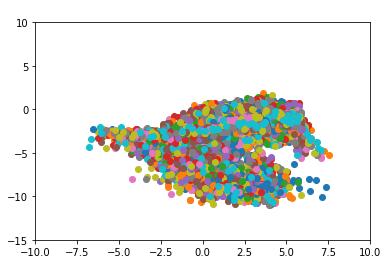

In [12]:
# Create a plot with white titles, axes
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
for i in range(220):
    plt.scatter(df2_train[i].loc[:,0], df2_train[i].loc[:,1])

plt.xlim(-10, 10)
plt.ylim(-15, 10)
plt.title("Scatter Plot")
plt.setp(plt.title('Plot of all'), color='white')

In [8]:
# Check shapes of blocks
a = []
for i in range(6599):
    a.append(df2_train[i].shape[0])

pd.DataFrame(a).describe()

,0
count,6599.000000
mean,39.888468
std,8.716337
min,4.000000
25%,34.000000
50%,39.000000
75%,45.000000
max,93.000000


C:\Users\19083\anaconda3\envs\compsci371d\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


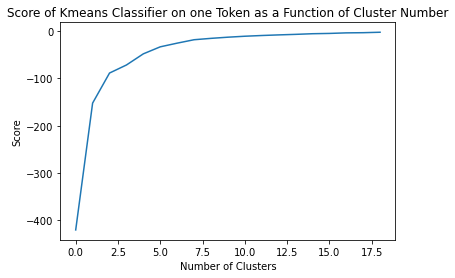

In [19]:
# Visualize how score changes with number of clusters for one block
scores = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i).fit(df2_train[0].loc[:,0:1])
    # kmeans.predict(df2[0].loc[:,0:1])
    scores.append(kmeans.score(df2_train[0].loc[:,0:1]))

plt.title("Score of Kmeans Classifier on one Token as a Function of Cluster Number")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.plot(scores)
plt.savefig('somescores', dpi=300)

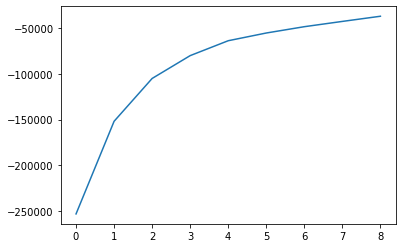

In [10]:
scores = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i).fit(df3_train[7].loc[:,0:1])
    scores.append(kmeans.score(df3_train[7].loc[:,0:1]))

plt.plot(scores)

In [3]:
# kmeans = KMeans(n_clusters = 5).fit(df3_train[1].loc[:, 0:1])
# y_hat = kmeans.predict(df3_train[1].loc[:, 0:1])
# plt.scatter(df3_train[2].loc[:,0], df3_train[2].loc[:,1], c = y_hat)

In [237]:
# df3[1]['yhat'] = y_hat
cov = np.cov(df3_train[1].loc[df3_train[1]['yhat'] == 0].loc[:,0:1].T)
guas = multivariate_normal(mean=kmeans.cluster_centers_[0], cov=cov)
guas.pdf([1.7,0])

# TODO:
# Train kmeans model for every digit (10)
# Find means, covariance matrices for each cluster in each model (50)

# Find likelihood each training block comes from each set of clusters
# for each test block: find max digit pdf- for each digit: find max pdf- for each sample: find max pdf for each cluster: find pdf

2200 * 10 * 40 * 5
# (For each test block: for each sample: for each model: find highest likelihood cluster)
# Then determine which digit cluster produced the highest likelihood
# Classify that sample accordingly
# Before that, just label test data as before
# Computer accuracies with this model

0.11643196217424867

In [5]:
df_cut_train[0].head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.81101,-7.2382,1.5429,-0.64774,1.42710,0.61356,0.365160,0.088906,0.47031,0.98844,0.044692
1,-0.37028,-7.1336,1.8856,-0.34316,0.96733,0.32763,0.429880,0.504790,0.41533,0.28804,0.086109
2,0.59659,-8.3059,1.6943,-0.66611,0.34967,-0.17425,0.820770,1.261100,0.41653,0.50050,0.571630
3,1.45850,-8.1957,1.8454,-1.14960,0.82660,-0.51313,0.067443,0.256370,0.11500,-0.10915,0.085991
4,2.08240,-8.6670,1.1995,-1.12400,1.24450,-0.10251,0.998670,0.571740,1.03840,0.17564,-0.032857


In [4]:
# Find cluster centers, covariance matrices for every digit in training set
means = []
cov_matrices = []
num_clusters = 5

for digit in range(10):
    kmeans = KMeans(n_clusters = num_clusters).fit(df_cut_train[digit].loc[:, 0:12])
    means.append(kmeans.cluster_centers_)
    df_cut_train[digit]['yhat'] = kmeans.predict(df_cut_train[digit].loc[:, 0:12])
    cov_matrices.append([])
    for cluster in range(num_clusters):
        cov_matrices[digit].append(np.cov(df_cut_train[digit].loc[df_cut_train[digit]['yhat'] == cluster].loc[:,0:12].T))

In [7]:
dist = multivariate_normal(mean = means[0][0], cov=cov_matrices[0][0])
np.log(dist.pdf(df_cut_test[0].loc[13,:10]))
# dist.pdf(df_cut_test[0].loc[0])

-16.857707968910358

In [43]:
# multivariate_normal(mean = means[0][0], cov=cov_matrices[0][0]).pdf((0,4))
df_cut_train[0].loc[:100, :]

,0,1,2,3,4,5,6,7,8,9,10,yhat
0,-0.81101,-7.238200,1.542900,-0.647740,1.427100,0.613560,0.365160,0.088906,0.470310,0.988440,0.044692,1
1,-0.37028,-7.133600,1.885600,-0.343160,0.967330,0.327630,0.429880,0.504790,0.415330,0.288040,0.086109,1
2,0.59659,-8.305900,1.694300,-0.666110,0.349670,-0.174250,0.820770,1.261100,0.416530,0.500500,0.571630,1
3,1.45850,-8.195700,1.845400,-1.149600,0.826600,-0.513130,0.067443,0.256370,0.115000,-0.109150,0.085991,1
4,2.08240,-8.667000,1.199500,-1.124000,1.244500,-0.102510,0.998670,0.571740,1.038400,0.175640,-0.032857,1
5,1.99960,-8.536900,1.325200,-0.649020,1.295400,-0.171020,0.782120,-0.144860,0.188130,-0.140100,0.678310,1
6,2.57840,-7.757300,2.104800,-1.112500,1.010800,-0.692160,0.721500,0.166520,0.574810,0.138090,0.038214,1
7,2.25840,-8.607100,0.907130,-1.375200,0.125140,-0.665820,0.605580,0.257820,0.836290,0.096346,0.603170,1
8,2.50790,-7.463800,1.474900,-1.521600,0.454380,0.147430,1.229900,0.267640,0.719460,0.120830,-0.070116,1
9,3.25360,-8.568500,0.901470,-2.640400,-0.133320,-0.109950,0.737370,0.849910,0.438780,0.092423,1.035300,1


In [46]:
# predicted_digits = []
# for block in range(2200):
#     max_likelihood = -100000
#     for digit in range(10):
#         clikematrix = []
#         for cluster in range(num_clusters):
#             cluster_likelihoods = []
#             cluster_gaussian = multivariate_normal(mean = means[digit][cluster], cov=cov_matrices[digit][cluster])
#             for timeframe in range(df_cut_test[block].shape[0]):
#                 cloglikelihood = np.log(cluster_gaussian.pdf(df_cut_test[block].loc[timeframe,:]))
#                 cluster_likelihoods.append(cloglikelihood)
#             clikematrix.append(cluster_likelihoods)
#         for

covariances = np.asarray(cov_matrices)

print(np.linalg.inv(cov_matrices[0][0]))
# print(covariances[0][0])

for digit in covariances:
    for cluster in digit:
        print(np.linalg.det(cluster))

[[ 5.53463697e+14  3.72597840e+15  1.84581499e+15  2.05380645e+16
   6.81776290e+15  6.95315367e+15 -1.44353001e+16 -1.05054964e+16
   7.12576751e+14 -1.15598121e+16 -2.72696260e+15]
 [-1.78519879e+14  2.76918297e+16  1.94659166e+16  3.08471137e+16
  -1.18082489e+16  1.14400367e+16 -1.02225562e+16  1.79334947e+15
  -5.34694768e+15 -5.93062221e+16  2.31294641e+16]
 [-5.68784061e+15 -2.52144968e+15  2.25711375e+16 -5.51659871e+15
  -3.89506143e+15  5.97671419e+15 -1.48123756e+16 -5.55930142e+16
   1.96512124e+15 -2.70983520e+16 -4.22048594e+16]
 [ 2.20037707e+16  1.64460581e+16 -1.11606520e+16 -3.10680183e+16
  -1.70901567e+15 -2.81732001e+16  3.45272613e+16  5.72373974e+16
   1.33860110e+15  1.65934448e+16  5.00670346e+15]
 [ 1.42299363e+16 -2.86904499e+14 -1.50825068e+16 -1.26808907e+16
   1.86078496e+16 -1.37915962e+16  3.37430576e+16  3.89536146e+16
  -2.31309720e+16  2.38662758e+16  2.03800081e+16]
 [ 5.28100942e+15 -1.31051372e+16 -1.66277701e+16 -3.61013406e+16
   8.47046216e+15 -

In [8]:
# Run k-means classification algorithm

predicted_digits = np.zeros((2200,), dtype=int)
for block in range(2199):
    if ((block % 100) == 0):
        print(block)
    max_likelihood = -100000
    for digit in range(10):
        max_cluster_likelihoods = []
        for timeframe in range(df_cut_test[block].shape[0]):
            max_cluster_likelihood = -9999999
            for cluster in range(num_clusters):
                # print(cov_matrices[digit][cluster])
                # print("digit: " + str(digit) + " cluster: " + str(cluster) + " block: " + str(block) + " timeframe: " + str(timeframe))
                cluster_gaussian = multivariate_normal(mean = means[digit][cluster], cov=cov_matrices[digit][cluster])
                cloglikelihood = np.log(cluster_gaussian.pdf(df_cut_test[block].iloc[timeframe,:]))
                max_cluster_likelihood = max(max_cluster_likelihood, cloglikelihood)
            max_cluster_likelihoods.append(max_cluster_likelihood)
        digit_likelihood = np.sum(max_cluster_likelihoods)
        # print(digit_likelihood)
        if digit_likelihood > max_likelihood:
            predicted_digits[block] = digit
            max_likelihood = digit_likelihood
        # print(str(digit) + " " + str(digit_likelihood))

0
100
200
300
400


<ipython-input-8-92b753045b94>:16: RuntimeWarning: divide by zero encountered in log
  cloglikelihood = np.log(cluster_gaussian.pdf(df_cut_test[block].iloc[timeframe,:]))


500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


0.8549340609367895


(array([190., 211., 154., 169., 207., 188., 217., 177., 184., 183.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

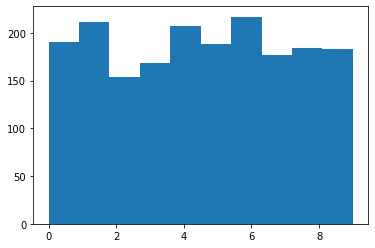

In [16]:
correct = 0
wrong_digits = []
for i in range(2199):
    if predicted_digits[i] == np.floor(i / 220):
        correct += 1
        wrong_digits.append(predicted_digits[i])
print(correct / 2199)

plt.hist(wrong_digits, bins=10)
# df_cut_test[1].iloc[0,:]
# df_cut_test[2198].loc[:,0:12]
# cov_matrices[7][2]
# plt.scatter(df_cut_train[7].loc[:,0], df_cut_train[7].loc[:,1])

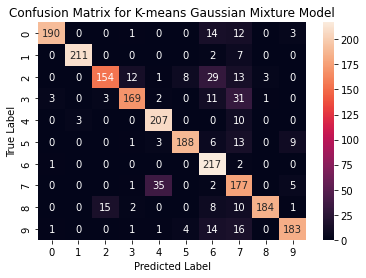

In [40]:
labels = []
for i in range(2200):
    labels.append(int(i/220))

cm = pd.DataFrame(confusion_matrix(labels, predicted_digits))
sns.heatmap(cm, annot=True, fmt='g')

plt.title('Confusion Matrix for K-means Gaussian Mixture Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.savefig("kmeans_confusion_matrix.png", dpi=300)

11 digits -> 91 % accuracy on 100 4's
13 digits -> 84 % accuracy on 100 5's